In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
df=pd.read_csv('/Users/a1443/PSCS/SCS/EcooVision/weather-sa-2017-2019-clean.csv')

In [23]:
df.head()

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,1 January 2017,00:00,2017,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,1 January 2017,01:00,2017,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,1 January 2017,03:00,2017,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,1 January 2017,04:00,2017,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,1 January 2017,05:00,2017,1,1,5,0,Clear,15,9,72%,1019.0,16


In [24]:
df=df.drop('Unnamed: 0',axis=1)

In [25]:
df.isnull().sum()

city           0
date           0
time           0
year           0
month          0
day            0
hour           0
minute         0
weather        0
temp           0
wind           0
humidity      17
barometer     72
visibility     0
dtype: int64

In [26]:
Median_value_barometer=df['barometer'].median()

In [27]:
df['humidity']=df['humidity'].str.rstrip('%')

In [28]:
df['humidity']=df['humidity'].astype('float')

In [29]:
Median_value_humidity=df['humidity'].median()

In [30]:
df.shape

(249023, 14)

In [31]:
# df['barometer']=df['barometer'].fillna(Median_value_barometer)
# df['humidity']=df['humidity'].fillna(Median_value_barometer)

In [32]:
df=df.dropna()

In [33]:
df['barometer'].value_counts()

barometer
1022.0    12779
1016.0    12637
1023.0    12612
1015.0    12592
1021.0    12511
1014.0    12475
1013.0    12298
1024.0    12029
1012.0    11585
1017.0    11308
1020.0    11170
1018.0    11048
1019.0    10973
1011.0    10776
1010.0     9664
1025.0     9501
1009.0     8786
1008.0     7687
1007.0     6989
1026.0     6689
1006.0     6136
1005.0     4814
1004.0     4087
1003.0     3189
1027.0     3052
1002.0     2677
1001.0     1770
1028.0     1392
1000.0     1085
999.0       710
998.0       678
997.0       677
996.0       610
995.0       526
1029.0      495
994.0       425
993.0       224
1030.0      138
992.0        71
1031.0       44
991.0        29
990.0         2
1032.0        2
1101.0        2
904.0         1
1053.0        1
Name: count, dtype: int64

In [34]:
df.shape

(248946, 14)

In [35]:
df.isnull().sum()

city          0
date          0
time          0
year          0
month         0
day           0
hour          0
minute        0
weather       0
temp          0
wind          0
humidity      0
barometer     0
visibility    0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248946 entries, 0 to 249022
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        248946 non-null  object 
 1   date        248946 non-null  object 
 2   time        248946 non-null  object 
 3   year        248946 non-null  int64  
 4   month       248946 non-null  int64  
 5   day         248946 non-null  int64  
 6   hour        248946 non-null  int64  
 7   minute      248946 non-null  int64  
 8   weather     248946 non-null  object 
 9   temp        248946 non-null  int64  
 10  wind        248946 non-null  int64  
 11  humidity    248946 non-null  float64
 12  barometer   248946 non-null  float64
 13  visibility  248946 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 28.5+ MB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,248946.0,2017.710162,0.706125,2017.0,2017.0,2018.0,2018.0,2019.0
month,248946.0,6.050642,3.521778,1.0,3.0,6.0,9.0,12.0
day,248946.0,15.690399,8.788302,1.0,8.0,16.0,23.0,31.0
hour,248946.0,12.536478,6.910143,1.0,7.0,13.0,19.0,24.0
minute,248946.0,0.130366,1.963688,0.0,0.0,0.0,0.0,59.0
temp,248946.0,24.720711,8.879591,-4.0,18.0,24.0,31.0,50.0
wind,248946.0,12.955083,8.709130,-1.0,7.0,11.0,19.0,163.0
humidity,248946.0,37.555265,23.593001,0.0,17.0,32.0,55.0,100.0
barometer,248946.0,1015.455581,6.970596,904.0,1011.0,1016.0,1021.0,1101.0
visibility,248946.0,11.053827,7.053169,-1.0,5.0,16.0,16.0,161.0


In [40]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

correlation_matrix.style.background_gradient(cmap='coolwarm') \
                   .set_properties(**{'font-family': 'Segoe UI'})


,year,month,day,hour,minute,temp,wind,humidity,barometer,visibility
year,1.000000,-0.311511,-0.010121,-0.002155,0.000302,-0.184419,0.045449,0.155639,0.088874,-0.064814
month,-0.311511,1.000000,0.012751,-0.001251,-0.004005,0.225076,-0.100294,-0.043022,-0.052223,0.020869
day,-0.010121,0.012751,1.000000,0.000793,-0.000217,0.021451,0.017182,-0.012066,-0.002518,-0.024024
hour,-0.002155,-0.001251,0.000793,1.000000,0.009105,0.211191,0.202712,-0.147692,-0.025086,-0.080876
minute,0.000302,-0.004005,-0.000217,0.009105,1.000000,-0.007223,0.069699,0.024953,-0.015397,-0.068176
temp,-0.184419,0.225076,0.021451,0.211191,-0.007223,1.000000,0.238074,-0.596374,-0.681923,-0.001856
wind,0.045449,-0.100294,0.017182,0.202712,0.069699,0.238074,1.000000,-0.178869,-0.134896,-0.210586
humidity,0.155639,-0.043022,-0.012066,-0.147692,0.024953,-0.596374,-0.178869,1.000000,0.290881,-0.151383
barometer,0.088874,-0.052223,-0.002518,-0.025086,-0.015397,-0.681923,-0.134896,0.290881,1.000000,-0.033053
visibility,-0.064814,0.020869,-0.024024,-0.080876,-0.068176,-0.001856,-0.210586,-0.151383,-0.033053,1.000000


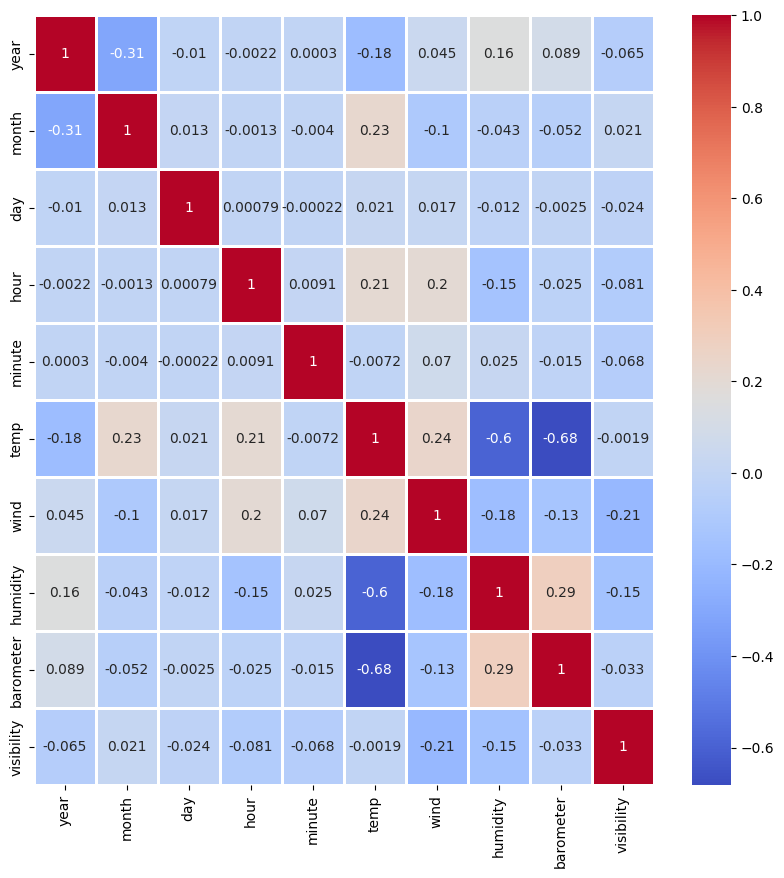

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# اختر الأعمدة من نوع float أو int
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), linewidths=1, cmap='coolwarm', annot=True)
plt.show()


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df.columns

Index(['city', 'date', 'time', 'year', 'month', 'day', 'hour', 'minute',
       'weather', 'temp', 'wind', 'humidity', 'barometer', 'visibility'],
      dtype='object')

In [46]:
X=df.drop(['city','date','time','temp','weather'],axis=1)
y=df['temp']

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(X_train,y_train)

LinearRegression()

In [51]:
prediction=lm.predict(X_test)

<Axes: ylabel='temp'>

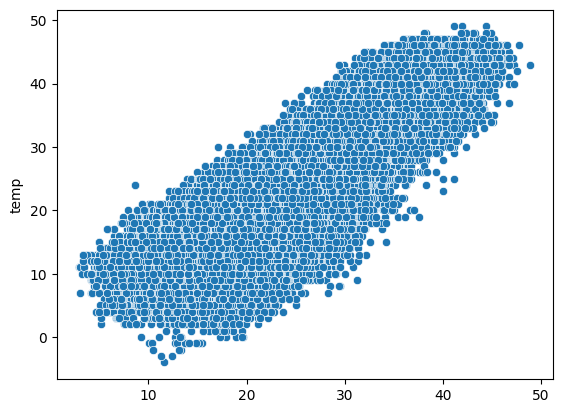

In [52]:
sns.scatterplot(x=prediction,y=y_test)

<Axes: xlabel='temp', ylabel='Count'>

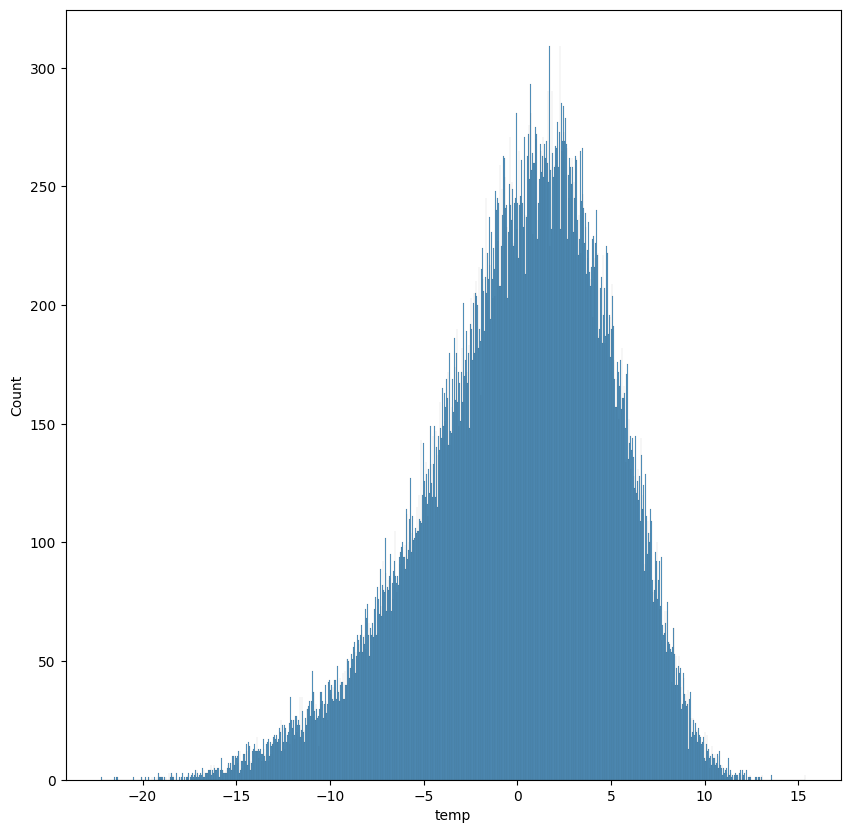

In [53]:
plt.figure(figsize=(10,10))
sns.histplot(y_test-prediction,bins=1000)

In [54]:
lm.score(X_train,y_train)*100

69.96643177174217

In [55]:
from sklearn import metrics

In [56]:
print('Mean Absoulte Error :',metrics.mean_absolute_error(prediction,y_test))

Mean Absoulte Error : 3.88667670979196


In [57]:
print('Mean Squared Error :',metrics.mean_squared_error(prediction,y_test))

Mean Squared Error : 23.835043216941454


In [58]:
print('Root Mean Square Error :',np.sqrt(metrics.mean_squared_error(prediction,y_test)))

Root Mean Square Error : 4.8821146255430605


In [59]:
df['city'].nunique()

13

In [60]:
df['city'].value_counts()

city
Jawf                20347
Mecca               20267
Tabuk               20234
Northern boarder    20233
Hail                20114
Madina              19964
Baha                19958
Najran              19847
Jazan               19829
Qassim              19786
EP                  18459
Riyadh              16420
Assir               13488
Name: count, dtype: int64

In [61]:
df_jeddah=df[df['city']=='Mecca']

In [62]:
df=df.sort_values('month')

In [63]:
month=df.groupby('month').min()

In [40]:
month=month.reset_index()

In [64]:
df['weather'].value_counts()

weather
Clear                                          98788
Sunny                                          82170
Passing clouds                                 34374
Scattered clouds                               15302
Partly sunny                                    6925
                                               ...  
Sprinkles  Low level haze                          1
Rain  Clear                                        1
Strong thunderstorms  More clouds than sun         1
Heavy rain  More clouds than sun                   1
Strong thunderstorms  Cloudy                       1
Name: count, Length: 81, dtype: int64

In [65]:
x=df['weather'].str.contains('rain')

In [69]:
df[x]

,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
133065,Tabuk,26 January 2019,22:00,2019,1,26,22,0,Light rain Passing clouds,21,7,60.0,1014.0,9
133070,Tabuk,27 January 2019,03:00,2019,1,27,3,0,Light rain Passing clouds,18,20,68.0,1013.0,9
76414,EP,30 January 2019,18:00,2019,1,30,18,0,Light rain Mostly cloudy,18,7,73.0,1018.0,-1
76377,EP,29 January 2019,05:00,2019,1,29,5,0,Light rain Partly cloudy,20,22,69.0,1015.0,8
76385,EP,29 January 2019,13:00,2019,1,29,13,0,Light rain Broken clouds,21,28,60.0,1018.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74637,EP,12 November 2018,17:00,2018,11,12,17,0,Light rain Partly cloudy,26,19,70.0,1014.0,-1
74580,EP,10 November 2018,06:00,2018,11,10,6,0,Light rain Mostly cloudy,21,15,88.0,1014.0,7
36676,Hail,15 December 2018,14:00,2018,12,15,14,0,Light rain Partly sunny,15,19,100.0,1023.0,-1
16884,Qassim,15 December 2018,14:00,2018,12,15,14,0,Light rain Partly sunny,15,19,100.0,1023.0,-1


In [74]:
df = df[(df['hour'] >= 0) & (df['hour'] <= 23)]

In [75]:
df.to_csv("cleaned_data.csv", index=False)


<Axes: xlabel='year'>

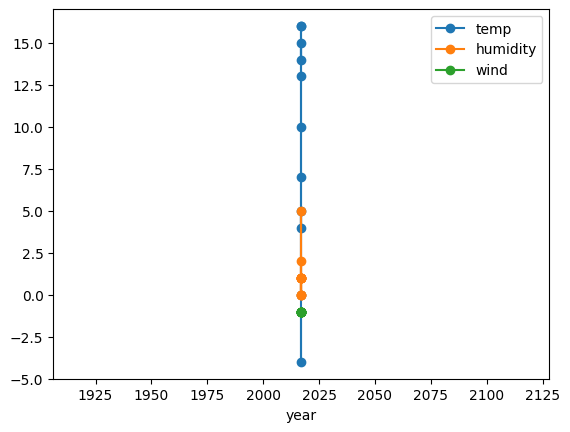

In [71]:
month.plot(y=['temp','humidity','wind'],x='year',marker='o',kind='line')

<Axes: xlabel='temp', ylabel='month'>

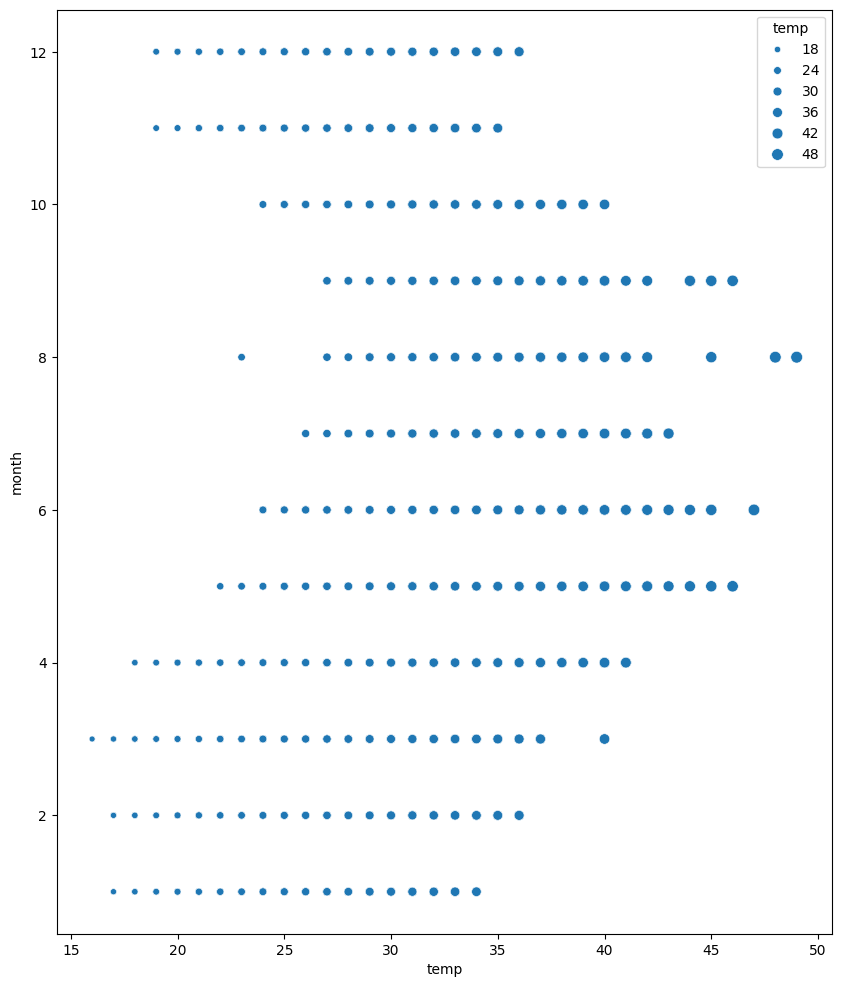

In [72]:
plt.figure(figsize=(10,12))
sns.scatterplot(x='temp',y='month',data=df_jeddah,size='temp')